In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [689]:
df= pd.read_csv('cleaned_dataset.csv')

In [690]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [691]:
df.shape

(243, 15)

## Exploratory Date Analysis

#### Descriptive Statistics of numeric columns

In [694]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [695]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

Due to some extra spaces in the class labels they were treated as different classes . Lets fix them

In [697]:
df['Classes'] = df['Classes'].apply(lambda x: 'not fire' if 'not fire' in x else 'fire')

In [698]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [699]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


# Univariate Analysis

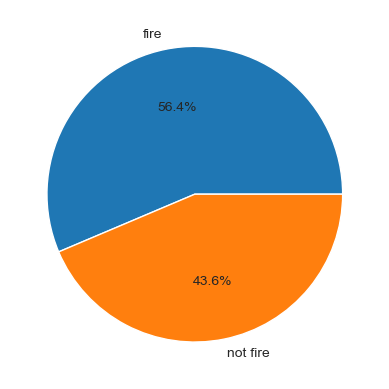

In [701]:
# pie chart for classes proportion
classes = df['Classes'].value_counts(normalize = True)
plt.pie(classes.values,labels=classes.index, autopct='%1.1f%%')
plt.show()

In [702]:
columns = df.drop(['day','month','year','Classes','Region'],axis=1)

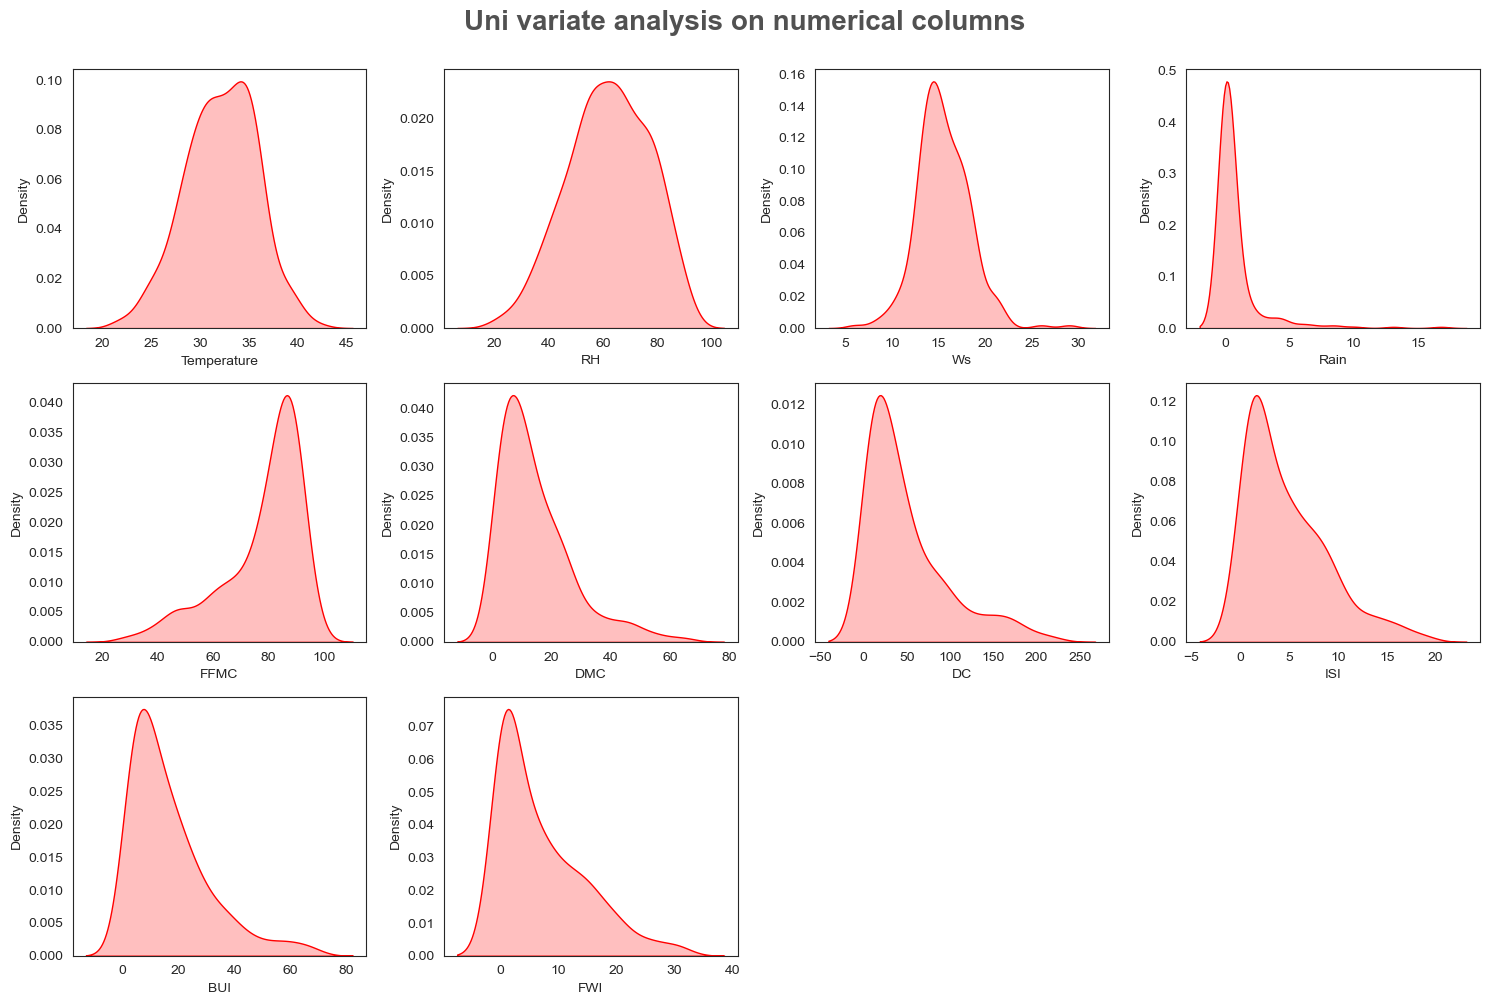

In [703]:
sns.set_style('white')
plt.figure(figsize=(15,10))
plt.suptitle("Uni variate analysis on numerical columns", fontsize = 20, fontweight = 'bold', alpha = 0.8, y=1.)
for i,col in enumerate(columns):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=df[col],shade = True, color ='r')
    plt.xlabel(col)
    plt.tight_layout()

##### Observations
1. BUI, FWI, DMC, DC, ISI and Rain are right skewed
2. FFMC is left skewed
3. Temperature,RH,Ws are almost normally distributed

# Bivariate Analysis

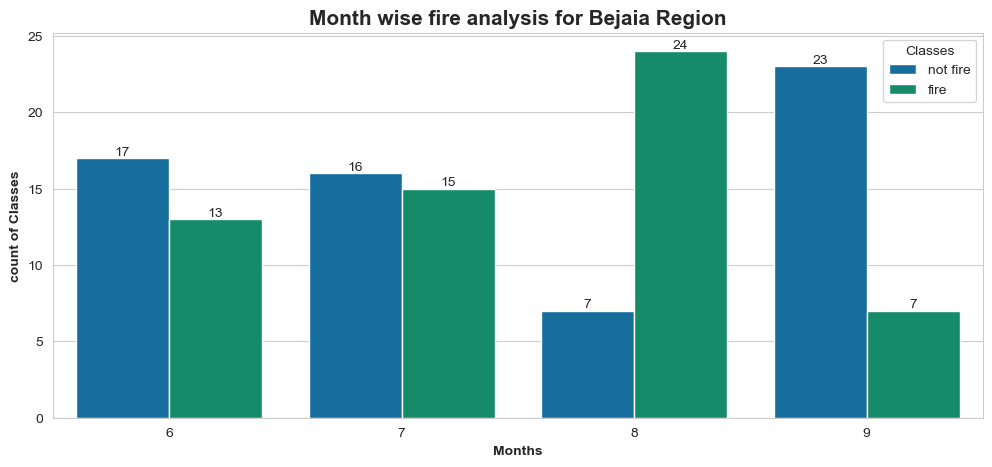

In [706]:
Bejaia_region = df[df['Region']==0]
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
ax=sns.countplot(x='month',hue='Classes',data=Bejaia_region,palette ='colorblind6')
plt.xlabel('Months',weight='bold')
plt.ylabel('count of Classes',weight='bold')
plt.title('Month wise fire analysis for Bejaia Region',fontsize=15,weight='bold')
for bars in ax.containers:
    ax.bar_label(bars)

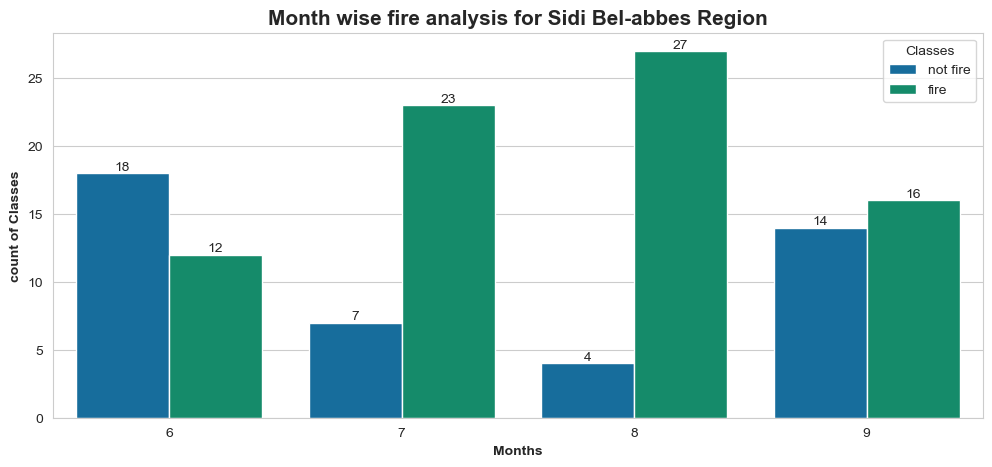

In [707]:
sidi_bel_abbes_region = df[df['Region']==1]
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
bx=sns.countplot(x='month',hue='Classes',data=sidi_bel_abbes_region,palette ='colorblind6')
plt.xlabel('Months',weight='bold')
plt.ylabel('count of Classes',weight='bold')
plt.title('Month wise fire analysis for Sidi Bel-abbes Region',fontsize=15,weight='bold')
for bars in bx.containers:
    bx.bar_label(bars)

In [708]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [709]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


### Checking for multicollinearity

<Axes: >

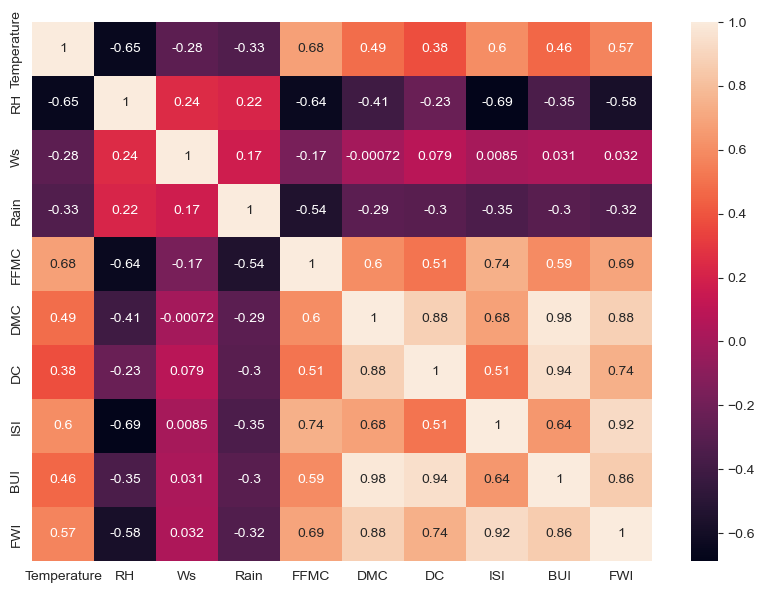

In [710]:
plt.figure(figsize=(10,7))
sns.heatmap(df.iloc[:,:-2].corr(),annot = True)

Lets look at BUI, DC and DMC carefully

In [712]:
df[['BUI','DC','DMC']].corr()

,BUI,DC,DMC
BUI,1.000000,0.941988,0.982248
DC,0.941988,1.000000,0.875925
DMC,0.982248,0.875925,1.000000


These three columns are highly correlated so we can drop two of those

In [714]:
# Lets drop BUI and DMC
df.drop(['BUI','DC'],axis = 1, inplace = True)

In [715]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,not fire,0


# Feature Engineering

### Encoding 

In [718]:
# Encoding Classes feature from categorical to numerical
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [719]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0


### Feature Scaling

In [721]:
x = df.drop('Classes',axis =1)
y = df['Classes']

In [722]:
# Standardizing features
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

#### Comparision of features before standardizing and after standardizing

<Axes: >

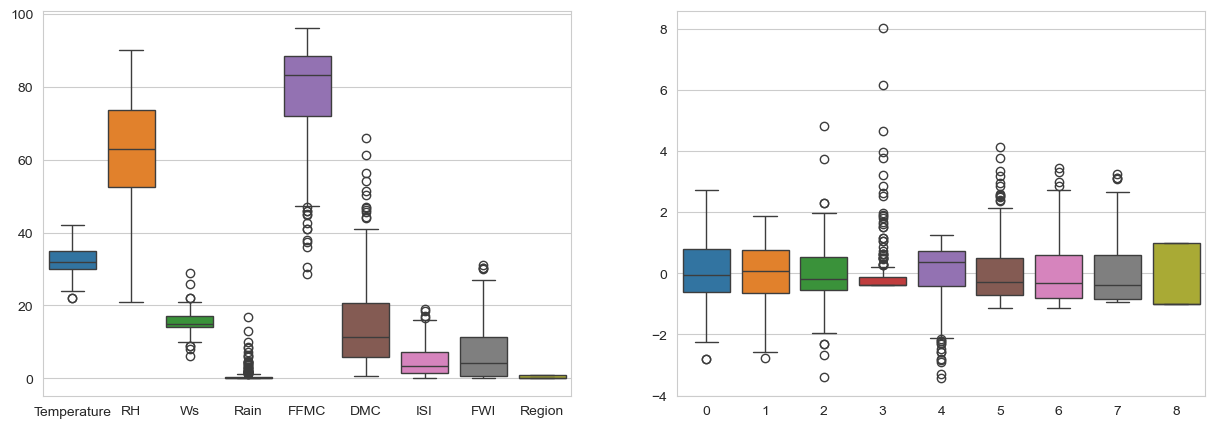

In [724]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x)
plt.subplot(1,2,2)
sns.boxplot(x_scaled)

In [725]:
x.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0


In [726]:
x = scalar.fit_transform(x)
x

array([[-0.87065469, -0.34067323,  0.8932769 , ..., -0.83035573,
        -0.88015863, -0.99589321],
       [-0.87065469, -0.07035945, -0.88887652, ..., -0.90272026,
        -0.8936262 , -0.99589321],
       [-1.69925426,  1.34878787,  2.31899963, ..., -1.07157084,
        -0.93402893, -0.99589321],
       ...,
       [-1.42305441,  1.68668009,  4.81401441, ..., -1.04744933,
        -0.92056135,  1.00412373],
       [-2.25165398, -0.54340856,  0.8932769 , ..., -0.73386968,
        -0.85322348,  1.00412373],
       [-2.25165398,  0.13237588, -0.17601515, ..., -0.85447724,
        -0.88015863,  1.00412373]])

# Save the Dataset as Preprocessed Dataset

In [727]:
Independent_features = pd.DataFrame(x)

In [728]:
Dependent_feature = pd.DataFrame(y)

In [729]:
Training_dataset = pd.concat([Independent_features,Dependent_feature],axis = 1)

In [730]:
Training_dataset.to_csv('Preprocessed Dataset.csv',index=False)